In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
%matplotlib inline 

In [2]:
insDF=pd.read_csv('insurance.csv')
insDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insDF.shape

(1338, 7)

In [4]:
insDF.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
insDF[insDF["age"]<=0]

,age,sex,bmi,children,smoker,region,charges


In [6]:
insDF["sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
insDF[insDF["bmi"]<=0]

,age,sex,bmi,children,smoker,region,charges


In [8]:
insDF["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
insDF["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [10]:
insDF["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
insDF[insDF["charges"]<=0]

,age,sex,bmi,children,smoker,region,charges


In [12]:
#Age,children are decrete numerical variables
#bmi,charges are continious numerical variables
#sex,smoker, region are categorical varibales
insDF.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
insDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


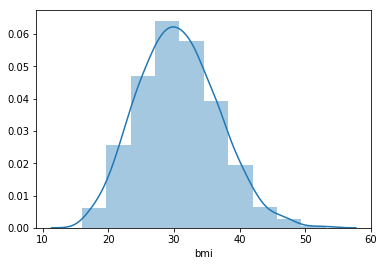

In [14]:
sns.distplot(insDF['bmi'],kde=True,bins=10)


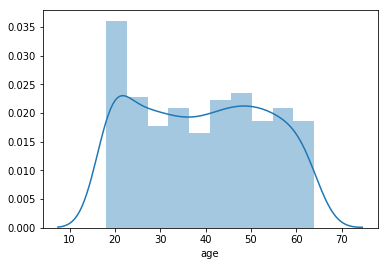

In [15]:
sns.distplot(insDF['age'],kde=True,bins=10)


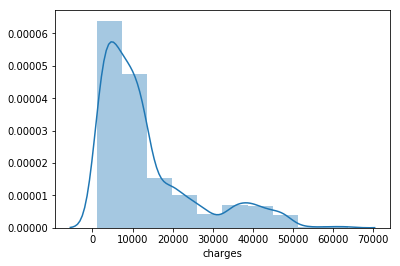

In [16]:
sns.distplot(insDF['charges'],kde=True,bins=10)

In [17]:
insDF.skew(axis = 0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [18]:
#children is moderatly positive skeweed and charges is highly positive skewness 
#age and bmi data are fairly symmetrical

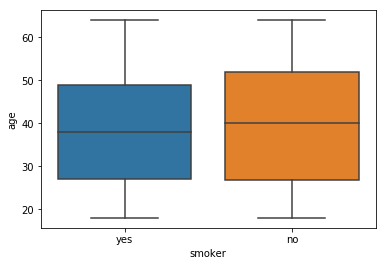

In [19]:
sns.boxplot(y='age',x='smoker',data=insDF)
plt.show()
#age does not have any outliers

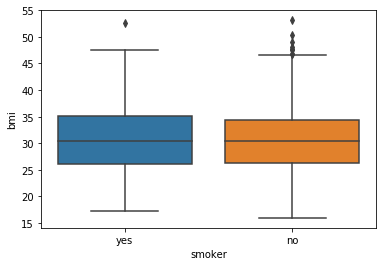

In [20]:
sns.boxplot(y='bmi',x='smoker',data=insDF)
plt.show()
#from the box plot we can see that we have outliers for bmi , smoker have very less outliers
#but for non smokers the outliers are large in number


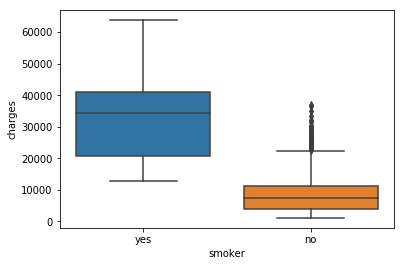

In [21]:
sns.boxplot(y='charges',x='smoker',data=insDF)
plt.show()
#we can see from the boxplot no outliers for smoker 
#but for non smoker we have large number of outliers 

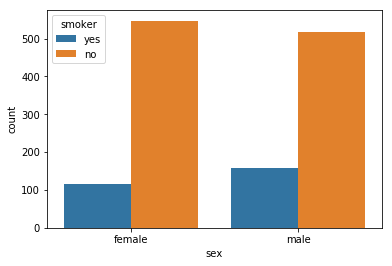

In [22]:
sns.countplot(x='sex',data=insDF,hue='smoker')
#we have almost equal number of male and female with male smoker sightly more than female smoker

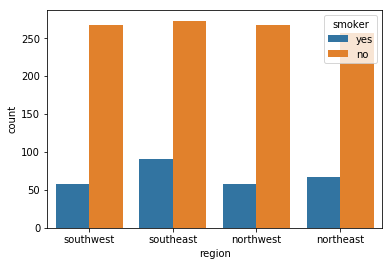

In [23]:
sns.countplot(x='region',data=insDF,hue='smoker')
#we have more data from southeast region and with higher number of smokers

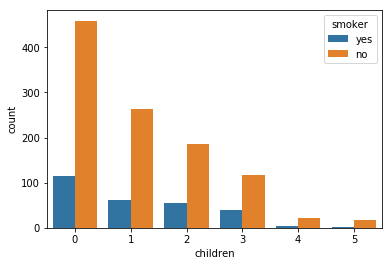

In [24]:
sns.countplot(x='children',data=insDF,hue='smoker')


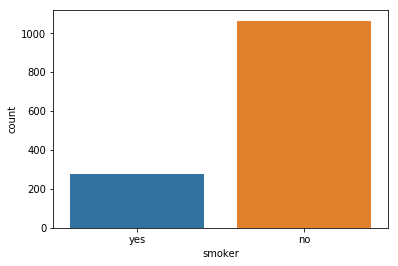

In [25]:
sns.countplot(x='smoker',data=insDF)
#we have very less data for smoker than non smoker

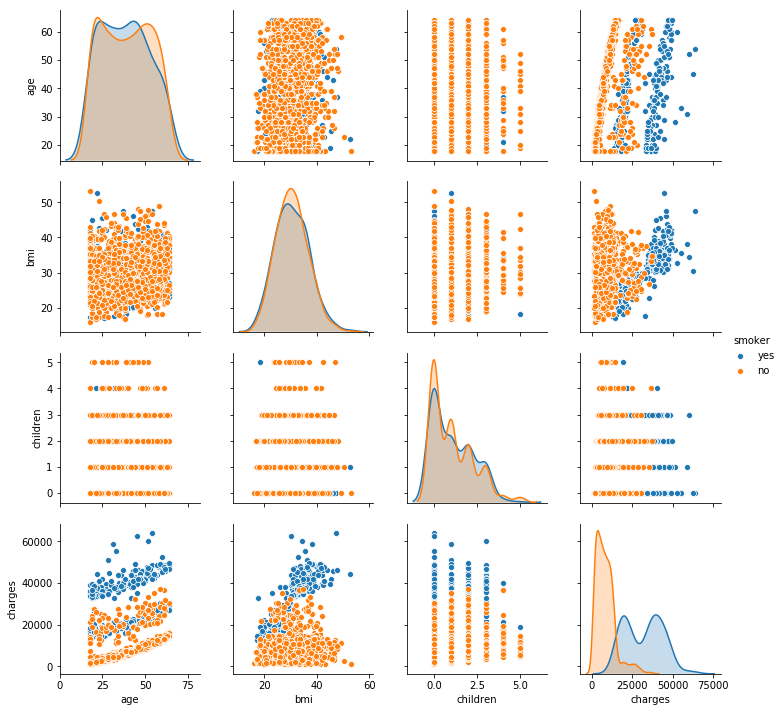

In [26]:
sns.pairplot(insDF,hue='smoker')

### statistical evidence


##### a. Do charges of people who smoke differ significantly  from the people who don't?  

In [27]:
print("mean: ",insDF['charges'].mean(),"\n std: ",insDF['charges'].std())

mean:  13270.422265141257 
 std:  12110.011236693994


The null hypothesis states that charges for smoker and non smoker do not differ
The alternative hypthesis states that charges do differ significantly between smoker and non smoker

* $H_0$: $\mu{smoker}$ - $\mu {non-smoker}$ =      0
* $H_A$: $\mu{smoker}$ - $\mu {non-smoker}$ $\neq$  0

Here we select $\alpha$ = 0.05 and sample size > 30 and population standard deviation is not known.

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* So you use the t distribution and the $t_STAT$ test statistic for two sample unpaired test.


** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

In [28]:
ins_SDF=insDF[insDF['smoker']=='yes'].charges
ins_NSDF=insDF[insDF['smoker']=='no'].charges

In [29]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [30]:
t_statistic, p_value  =  stats.ttest_ind(ins_NSDF,ins_SDF)
print('P Value ' , p_value)  

P Value  8.271435842177219e-283


In [31]:
print('t_statistic ',t_statistic)

t_statistic  -46.664921172723716


 p value is 8.271435842177219e-283 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence  to reject the null hypothesis that the charges for  these smoker and non smoker is different.

### b. Does bmi of males differ significantly from that of  females? 

* $H_0$:$\mu {bmi(male)}$ = $\mu {bmi(female)}$ 
* $H_A$: $\mu{bmi(male)}$ $\neq$  $\mu {bmi(female)}$  

In [37]:
print("mean: ",insDF['bmi'].mean(),"\n std: ",insDF['bmi'].std())
print("mean Male: ",insDF[insDF['sex']=='male'].bmi.mean(),"\n std Male: ",insDF[insDF['sex']=='male'].bmi.std())
print("mean Female: ",insDF[insDF['sex']=='female'].bmi.mean(),"\n std Female: ",insDF[insDF['sex']=='female'].bmi.std())


mean:  30.663396860986538 
 std:  6.098186911679017
mean Male:  30.943128698224832 
 std Male:  6.140434615792248
mean Female:  30.377749244713023 
 std Female:  6.046023085745338


In [33]:
ins_MDF=insDF[insDF['sex']=='male'].bmi
ins_FDF=insDF[insDF['sex']=='female'].bmi

In [34]:
bmi_t_statistic, bmi_p_value  =  stats.ttest_ind(ins_MDF,ins_FDF)
print('P Value ' , bmi_p_value)  

P Value  0.08997637178984932


In [35]:
print('t_statistic ',bmi_t_statistic)

t_statistic  1.696752635752224


#### p value is 0.08997637178984932 and > 0.05 so we fail reject the null hypothesis. 
#### So, we conclude that there is a no evidance that bmi is significant different between male and female.

### c. Is the proportion of smokers significantly different  in different genders?  

Null hypothesis: $H_0$: There is no difference in proportion of smokers between male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in proportion of smokers between male and female

Here we select α = 0.05

We use the chi-square test of independence to find out the difference of categorical variables 

In [58]:
mc=insDF[(insDF['sex']=='male') & (insDF['smoker']=='yes')].sex.count()
fc=insDF[(insDF['sex']=='female') & (insDF['smoker']=='yes')].sex.count()
mn=insDF[(insDF['sex']=='male') & (insDF['smoker']=='no')].sex.count()
fn=insDF[(insDF['sex']=='female') & (insDF['smoker']=='no')].sex.count()
insDF_P_data={'gender':['Male','Female'],'smoker':[mc,fc],'non-smoker':[mn,fn]}
insDF_P=pd.DataFrame(insDF_P_data);
insDF_P


,gender,smoker,non-smoker
0,Male,159,517
1,Female,115,547


In [59]:

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency([[mc,mn],[fc,fn]])

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1


#### p value is 0.006548 and < 0.05 so we reject the null hypothesis. 
#### So, we conclude that there is a significant difference in proportions of the smokers between male and female.

 ### d. Is the distribution of bmi across women with no  children, one child and two children, the same 

Null hypothesis: $H_0$: There is no difference in distribution of bmi for female between  no children, one child and two children
                        
Alternative hypothesis: $H_A$: There is a significant difference in distribution of bmi for female between one child and two children

In [60]:
nc=np.array(insDF[(insDF['sex']=='female') & (insDF['children']==0)].bmi)
oc=np.array(insDF[(insDF['sex']=='female') & (insDF['children']==1)].bmi)
tc=np.array(insDF[(insDF['sex']=='female') & (insDF['children']==2)].bmi)

In [61]:
print('Count, Mean and standard deviation of bmi  of women with children 0: %3d, %3.2f and %3.2f' % (len(nc), nc.mean(),np.std(nc,ddof =1)))
print('Count, Mean and standard deviation of bmi  of women with children 1: %3d, %3.2f and %3.2f' % (len(oc), oc.mean(),np.std(oc,ddof =1)))
print('Count, Mean and standard deviation of bmi  of women with children 2: %3d, %3.2f and %3.2f' % (len(tc), tc.mean(),np.std(tc,ddof =1)))


Count, Mean and standard deviation of bmi  of women with children 0: 289, 30.36 and 5.97
Count, Mean and standard deviation of bmi  of women with children 1: 158, 30.05 and 5.79
Count, Mean and standard deviation of bmi  of women with children 2: 119, 30.65 and 6.63


In [63]:
bmi_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'children': '0', 'bmi':nc})
df2            = pd.DataFrame({'children': '1', 'bmi':oc})
df3            = pd.DataFrame({'children': '2', 'bmi':tc})

bmi_inc_df = bmi_inc_df.append(df1) 
bmi_inc_df = bmi_inc_df.append(df2) 
bmi_inc_df = bmi_inc_df.append(df3) 

In [64]:
bmi_inc_df.head()

,children,bmi
0,0,27.90
1,0,25.74
2,0,25.84
3,0,26.29
4,0,39.82


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


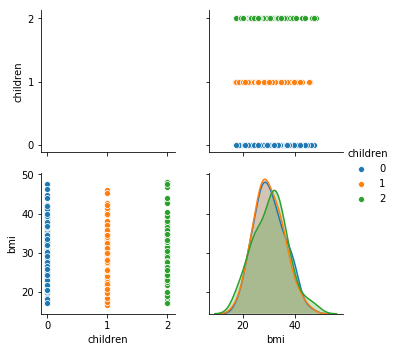

In [65]:
sns.pairplot(bmi_inc_df,diag_kind='kde',hue='children')

In [67]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


In [68]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = bmi_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


#### f critical value is  0.334472 and < confidence 3.15 so we reject the null hypothesis. 
#### So, we conclude that there is a significant  in distribution of bmi for female between one child and two children